In [190]:
import cv2
import numpy as np

In [191]:
#takes in img as np nd array
#taking in as grey scale makes it so we do not use RGB values only a single value
img = cv2.imread('TestTable.png', cv2.IMREAD_GRAYSCALE)

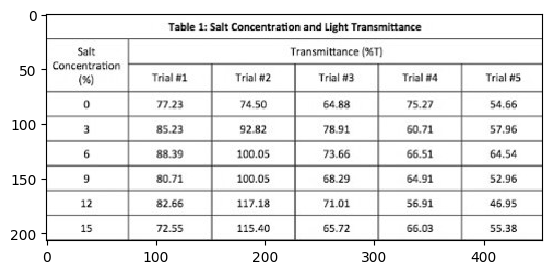

In [192]:
from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest',cmap='gray')
plt.show()

In [193]:

from collections import deque
def flood_fill_bfs(img, x, y, color_of_point, paint_color):
    top_left = (x,y)
    bottom_right = (-1,-1)
    queue = deque([(x,y)])
    img[x,y] = paint_color
    while queue:
        current_x, current_y = queue.popleft()
        neighbors = [(current_x - 1, current_y),
                        (current_x + 1, current_y),
                        (current_x, current_y-1),
                        (current_x, current_y+1)
        ]
        x_high, y_high = bottom_right
        if current_x >= x_high:
            x_high = current_x 
        if current_y >= y_high:
            y_high = current_y
        bottom_right = (x_high,y_high)
        
        x_low, y_low = top_left
        if current_x <= x_low:
            x_low = current_x 
        if current_y <= y_low:
            y_low = current_y
        top_left = (x_low,y_low)

        for neighbor_x, neighbor_y in neighbors:
            if 0 <= neighbor_x < len(img) and 0 <= neighbor_y < len(img[0]) and img[neighbor_x,neighbor_y] == color_of_point:
                img[neighbor_x,neighbor_y] = paint_color
                queue.append((neighbor_x,neighbor_y))
    return (top_left, bottom_right)
    

In [194]:
from collections import defaultdict
frequencyMap = defaultdict(lambda: 0)
for row in img:
    for pixel in row:
        frequencyMap[pixel] += 1

most_common_color = max(frequencyMap, key=frequencyMap.get)
most_common_color


255

In [195]:
for i, row in enumerate(img):
    for j, pixel in enumerate(row):
        # pixel = sum(pixel)
        if pixel >= most_common_color - 20:
            img[i][j] = most_common_color #np.array([0, 100, 0])

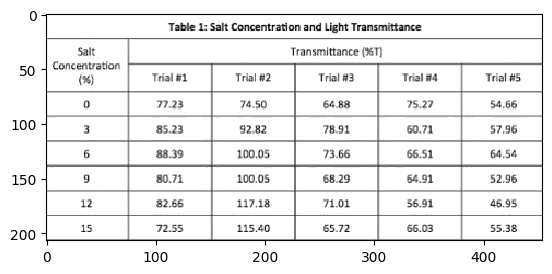

In [196]:
plt.imshow(img, interpolation='nearest',cmap='gray')
plt.show()

In [197]:
def find_first_coord(_img, color):
    for i, row in enumerate(_img):
        for j, pixel in enumerate(row):
            if pixel == color:
                return i,j            
    return-1,-1

In [198]:
num_cells = 0
cell_coordinates = []

x,y = find_first_coord(img,most_common_color)
# print(x,y)
while x < len(img):
    while y < len(img[0])-1:
        # print(img[x,y])
        if img[x,y] == most_common_color:
            start, end = flood_fill_bfs(img, x, y, most_common_color, most_common_color - 1)
            cell_coordinates.append((start,end)) #backwards because we iterate
            num_cells += 1
            x,y = end
            # print(end) 
        y+=1
    y=0
    x+=1
    
num_cells

# cell_coordinates

44

In [199]:
cell_coordinates

[((2, 0), (22, 453)),
 ((24, 77), (44, 453)),
 ((25, 0), (70, 73)),
 ((48, 77), (70, 149)),
 ((48, 153), (70, 226)),
 ((48, 229), (70, 302)),
 ((48, 306), (70, 378)),
 ((48, 382), (70, 453)),
 ((73, 0), (92, 73)),
 ((73, 77), (92, 149)),
 ((73, 153), (92, 226)),
 ((73, 229), (92, 302)),
 ((73, 306), (92, 378)),
 ((73, 382), (92, 453)),
 ((95, 0), (115, 73)),
 ((95, 77), (115, 149)),
 ((95, 153), (115, 226)),
 ((95, 229), (115, 302)),
 ((95, 306), (115, 378)),
 ((95, 382), (115, 453)),
 ((118, 0), (137, 73)),
 ((118, 77), (137, 149)),
 ((118, 153), (137, 226)),
 ((118, 229), (137, 302)),
 ((118, 306), (137, 378)),
 ((118, 382), (137, 453)),
 ((140, 0), (160, 73)),
 ((140, 77), (160, 149)),
 ((140, 153), (160, 226)),
 ((140, 229), (160, 302)),
 ((140, 306), (160, 378)),
 ((140, 382), (160, 453)),
 ((163, 0), (183, 73)),
 ((163, 77), (183, 149)),
 ((163, 153), (183, 226)),
 ((163, 229), (183, 302)),
 ((163, 306), (183, 378)),
 ((163, 382), (183, 453)),
 ((185, 0), (205, 73)),
 ((185, 77),

In [200]:
for top_left, btm_right in cell_coordinates:
    img[top_left[0],top_left[1]] = 255
    img[btm_right[0],btm_right[1]] = 255


In [201]:
# # i,j = find_first_coord(img, most_common_color)
# start, end = flood_fill_bfs(img, i, j, most_common_color, 120)

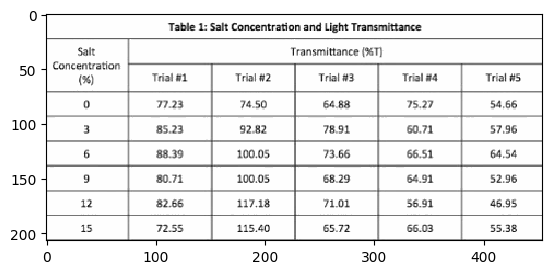

In [202]:
plt.imshow(img, interpolation='nearest',cmap='gray')
plt.show()

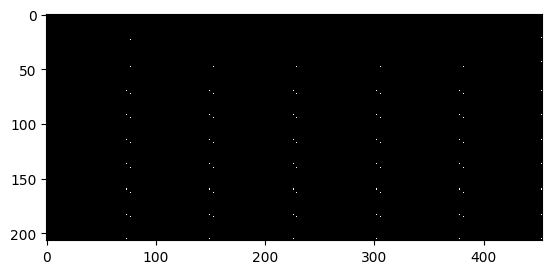

In [203]:
arr = np.zeros(img.shape)

for top_left, btm_right in cell_coordinates:
    arr[top_left[0],top_left[1]] = 255
    arr[btm_right[0],btm_right[1]] = 255
plt.imshow(arr, interpolation='nearest',cmap='gray')
plt.show()


In [204]:
sorted_cells = sorted(cell_coordinates, key=lambda coord:coord[0][0])
sorted_cells
 
# Goal: represent tabular data with nested dictionaries.
# i.e. {row: {col: cell}}
# Assuming a uniform n x n table (no combined rows/cols)
 
# start by organizing the points in separate lists?
 
row_table = {}
# Organize rows
for cell in sorted_cells:
    BR_HORIZONTAL = int(cell[1][1])
    BR = (int(cell[1][0]), int(cell[1][1]))
    if BR_HORIZONTAL not in row_table.keys():
        row_table[BR_HORIZONTAL] = [BR]
    else:
        row_table[BR_HORIZONTAL].append(BR)
 

col_table = {}
# Organize rows
for cell in sorted_cells:
    BR_VERTICAL = int(cell[1][0])
    BR = (int(cell[1][0]), int(cell[1][1]))
    if BR_VERTICAL not in col_table.keys():
        col_table[BR_VERTICAL] = [BR]
    else:
        col_table[BR_VERTICAL].append(BR)
row_table

{453: [(22, 453),
  (44, 453),
  (70, 453),
  (92, 453),
  (115, 453),
  (137, 453),
  (160, 453),
  (183, 453),
  (205, 453)],
 73: [(70, 73),
  (92, 73),
  (115, 73),
  (137, 73),
  (160, 73),
  (183, 73),
  (205, 73)],
 149: [(70, 149),
  (92, 149),
  (115, 149),
  (137, 149),
  (160, 149),
  (183, 149),
  (205, 149)],
 226: [(70, 226),
  (92, 226),
  (115, 226),
  (137, 226),
  (160, 226),
  (183, 226),
  (205, 226)],
 302: [(70, 302),
  (92, 302),
  (115, 302),
  (137, 302),
  (160, 302),
  (183, 302),
  (205, 302)],
 378: [(70, 378),
  (92, 378),
  (115, 378),
  (137, 378),
  (160, 378),
  (183, 378),
  (205, 378)]}

In [205]:
col_table

{22: [(22, 453)],
 44: [(44, 453)],
 70: [(70, 73), (70, 149), (70, 226), (70, 302), (70, 378), (70, 453)],
 92: [(92, 73), (92, 149), (92, 226), (92, 302), (92, 378), (92, 453)],
 115: [(115, 73), (115, 149), (115, 226), (115, 302), (115, 378), (115, 453)],
 137: [(137, 73), (137, 149), (137, 226), (137, 302), (137, 378), (137, 453)],
 160: [(160, 73), (160, 149), (160, 226), (160, 302), (160, 378), (160, 453)],
 183: [(183, 73), (183, 149), (183, 226), (183, 302), (183, 378), (183, 453)],
 205: [(205, 73), (205, 149), (205, 226), (205, 302), (205, 378), (205, 453)]}

In [206]:
table = np.zeros((len(col_table), len(row_table)))
table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [207]:
for i, y in enumerate(sorted(row_table)):
    print(row_table[y])

[(70, 73), (92, 73), (115, 73), (137, 73), (160, 73), (183, 73), (205, 73)]
[(70, 149), (92, 149), (115, 149), (137, 149), (160, 149), (183, 149), (205, 149)]
[(70, 226), (92, 226), (115, 226), (137, 226), (160, 226), (183, 226), (205, 226)]
[(70, 302), (92, 302), (115, 302), (137, 302), (160, 302), (183, 302), (205, 302)]
[(70, 378), (92, 378), (115, 378), (137, 378), (160, 378), (183, 378), (205, 378)]
[(22, 453), (44, 453), (70, 453), (92, 453), (115, 453), (137, 453), (160, 453), (183, 453), (205, 453)]


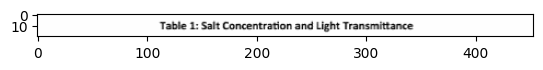

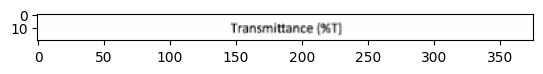

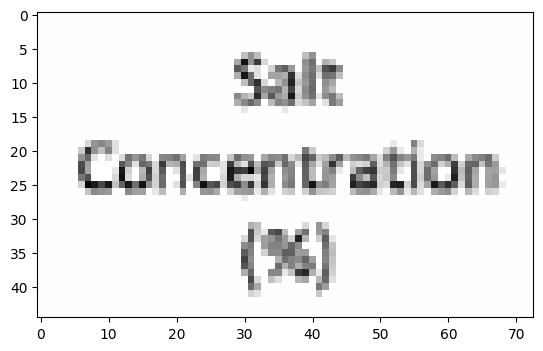

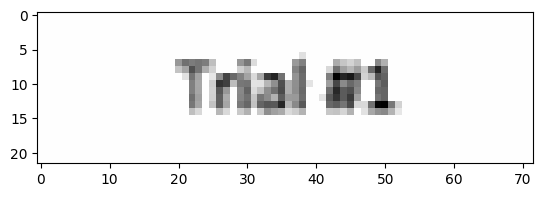

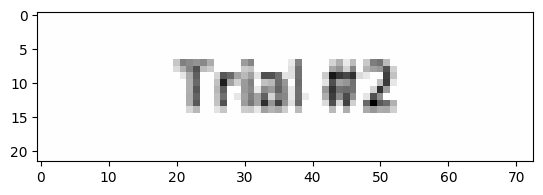

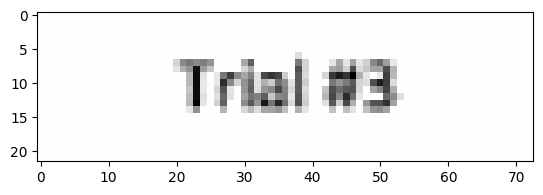

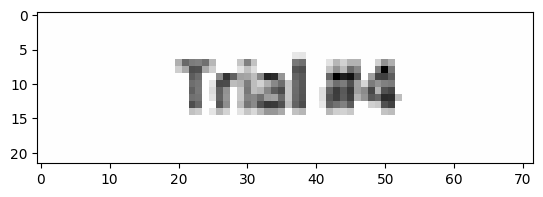

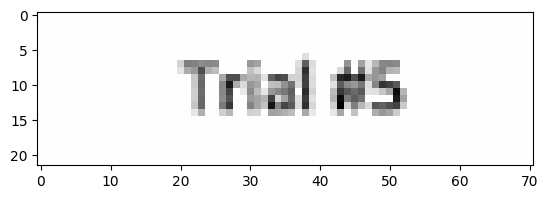

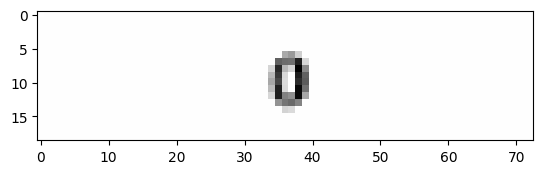

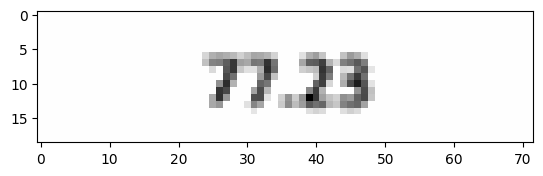

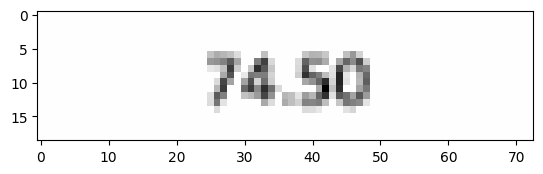

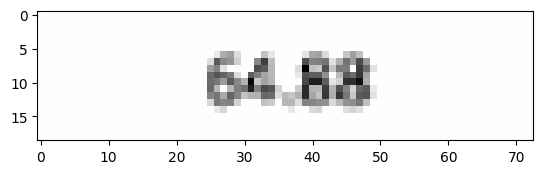

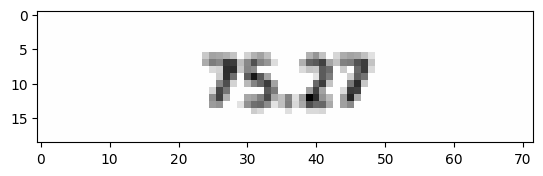

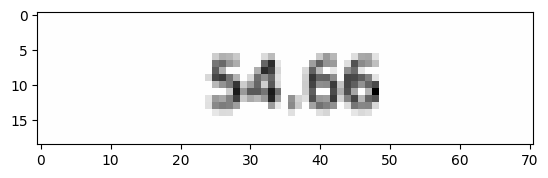

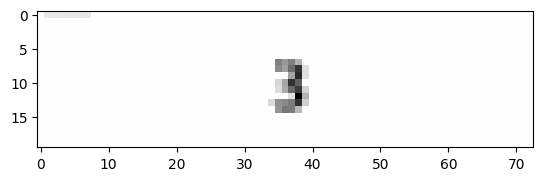

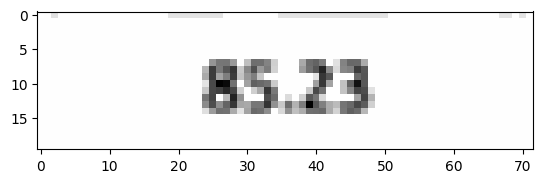

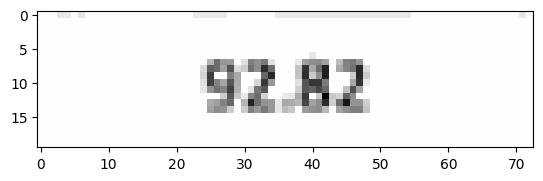

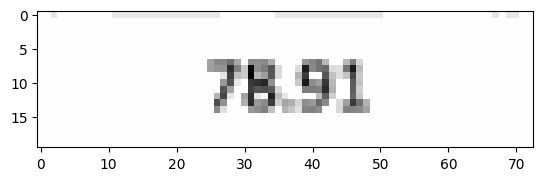

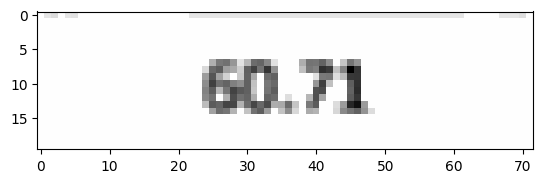

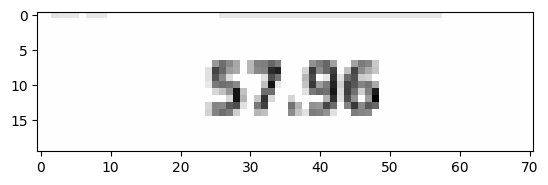

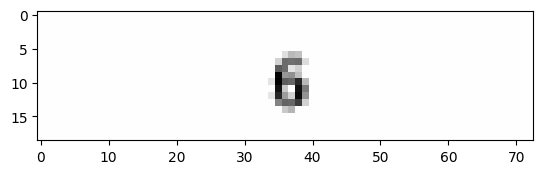

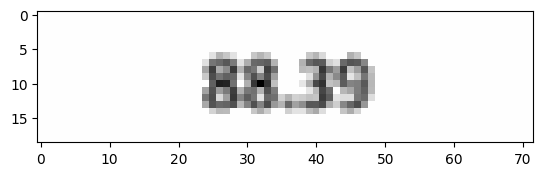

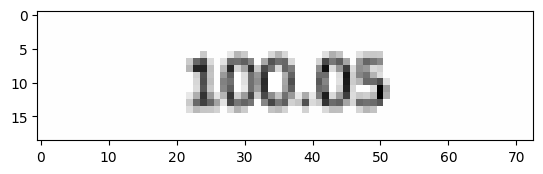

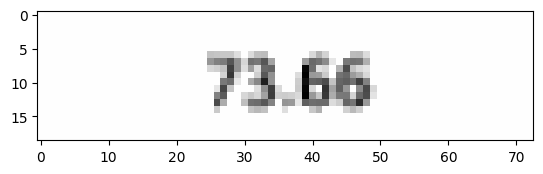

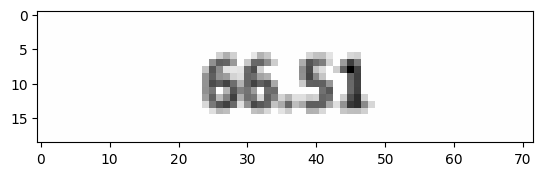

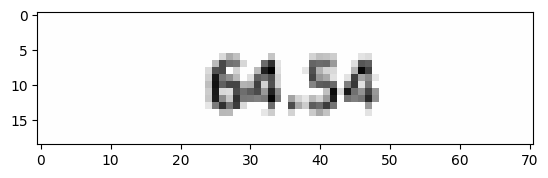

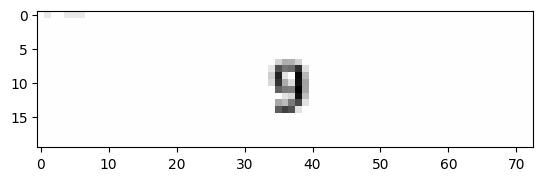

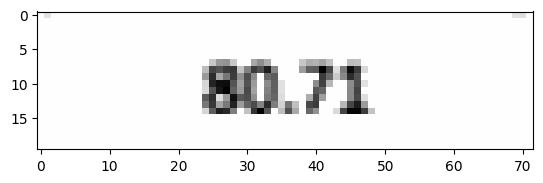

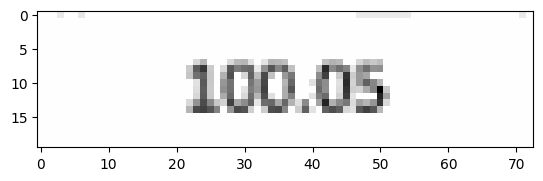

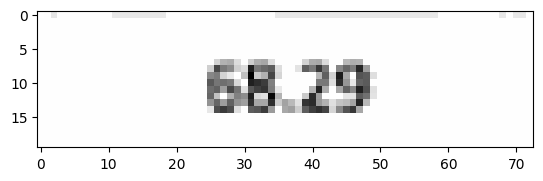

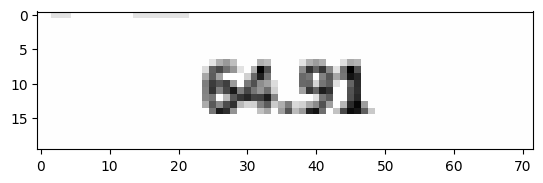

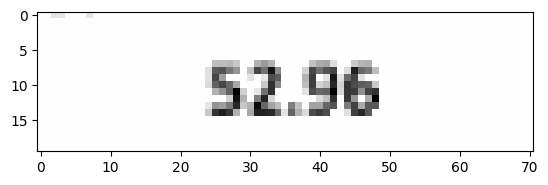

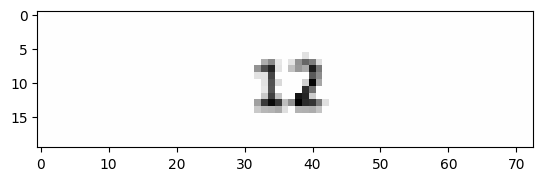

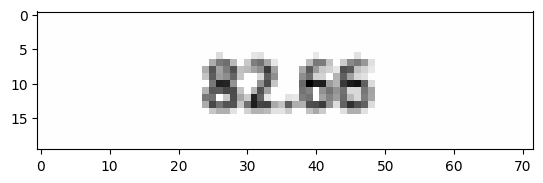

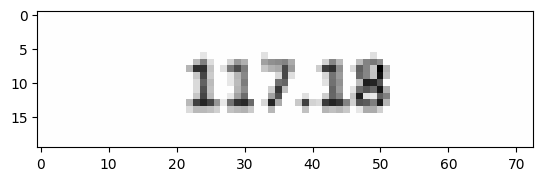

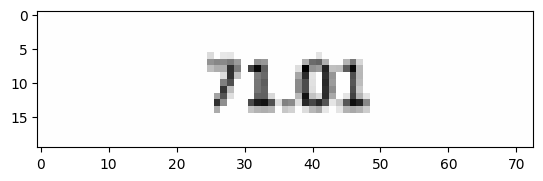

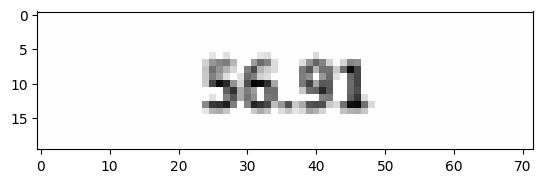

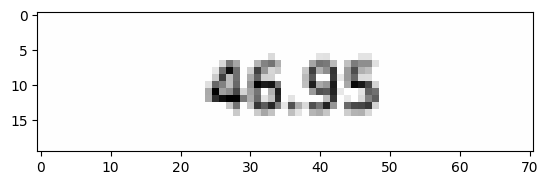

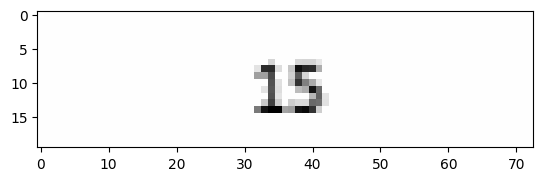

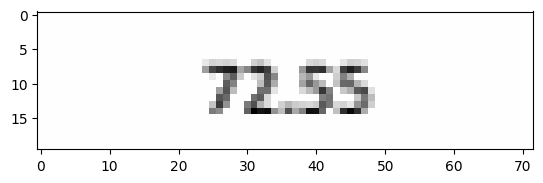

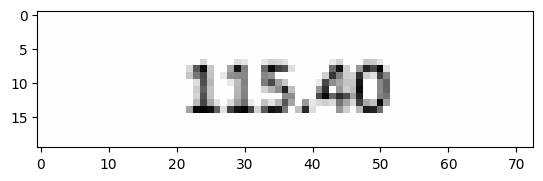

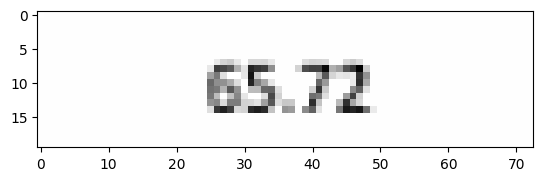

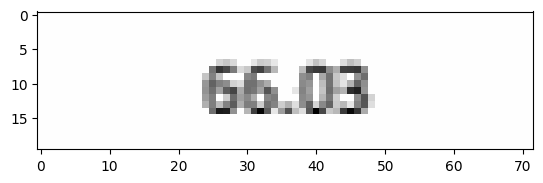

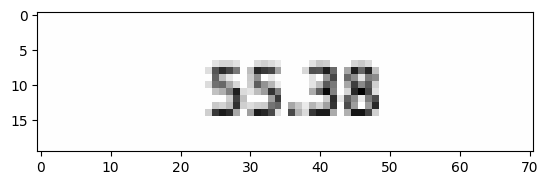

In [208]:

 
# # Organize columns
# # we know the first row should contain all column headers
# columns = {}
# for cell in list(table.values())[0]:
#     columns[cell]
       
# table
 
# bounding box testing
# from PIL import Image
 
# TL = (int(sorted_cells[0][0][0]), int(sorted_cells[0][0][1]))
# BR = (int(sorted_cells[0][1][0]), int(sorted_cells[0][1][1]))
 
# # [TL, BR]
# print(region)
 
# plt.imshow(region)
# plt.show()
 
for cell in sorted_cells:
    TL = (int(cell[0][0]), int(cell[0][1]))
    BR = (int(cell[1][0]), int(cell[1][1]))
 
    region = img[TL[0]:BR[0], TL[1]:BR[1]]
 
    # Extract cell data using OCR here
 
    # Fill in table dict with data?
    # region_colored = cv2.cvtColor(region, cv2.)
    # plt.figure(figsize=(2,1))
    plt.imshow(region, cmap='gray')
    plt.show()
  

In [209]:
from PIL import Image 
from pytesseract import pytesseract 
  
# Defining paths to tesseract.exe 
# and the image we would be using 
path_to_tesseract = r"C:\Users\benjamin.guerrieri\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

for cell in sorted_cells:
    TL = (int(cell[0][0]), int(cell[0][1]))
    BR = (int(cell[1][0]), int(cell[1][1]))
 
    region = img[TL[0]:BR[0], TL[1]:BR[1]]
    cell = Image.fromarray(region)
  
    pytesseract.tesseract_cmd = path_to_tesseract 
    
    # Passing the image object to image_to_string() function 
    # This function will extract the text from the image 
    text = pytesseract.image_to_string(cell) 
    
    # Displaying the extracted text 
    print(text[:-1])

‘Table 1: Salt Concentration and Light Transmittance


TypeError: 'Image' object is not subscriptable